In [1]:
import pandas as pd
import re
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

## Challenge 1: Data Cleaning, Transformations and ETL pipeline architecture

In [2]:
transaction = pd.read_csv(r'test_dataset\transactions.csv')
transaction.head(20)

,name,city,phone-number,email,id,TransactionID,Amount
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853,0,1372
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1,1779
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3,2,11
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,15abb55d-ec36-4b88-bba2-a58af8accd81,3,101
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,4,1318
5,Tony Price,Artesia,486-403-2838,TonyPrice91@xfinity.com,614b9bb1-ee00-40a7-9b7e-a96795d1663d,5,300
6,Michelle Mullins,Preston Heights,259-622-8878,Mullins_Michelle@protonmail.com,d556f557-06ea-4c6f-a712-4212eec6fca4,6,1039
7,Laura Prince,Angora,535-321-6444,Prince.Laura59@zoho.com,9523ebc0-4457-4f15-b179-c0ee0011f91b,7,36
8,Aaron Williams,Wegdahl,626-546-6484,Aaron_W@zoho.com,da841523-a03c-4cd4-a054-6e883238a424,8,843
9,Karen Garcia,Vineland,944-661-3507,Garcia_Karen@verizon.com,5d0fbc97-967b-4931-ba29-3d53a26ea78b,9,1533


In [3]:
loyalty = pd.read_csv(r'test_dataset\loyalty.csv')
loyalty.head(20)

,name,city,phone-number,license-plate,email,id
0,Gary Cannon,Pric#%edale,339-486-5500,BOB-0788,Gar#%y_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853
1,Brian Montes,Rosebud,336-853-9842,AXI-4190,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e
2,Christopher[ Todd Jr.,Llano.,1 59#%-161-0094,LRM-754,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3
3,Lynn Blake,Greenbank,174-4]98-313]0,MRW -4495,Blake_Lynn45@zoho. com,15abb55d-ec36-4b88-bba2-a58af8accd81
4,Jennifer Allen,S.N.P.J.,/240-375121-3895,HBI-2202,Je nnifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0
5,Tony Pric/e,[Artesia,486-403-2838,4YKJ366,TonyPrice91@xfinity.com,614b9bb1-ee00-40a7-9b7e-a96795d1663d
6,Michelle Mullin[s,Presto n Heights,259-622-8878,VYF-76#%68,M#%ullins_Michelle@protonmai]l.com,d556f557-06ea-4c6f-a712-4212eec6fca4
7,Laura Prince,Ang ora,535-321-6444,3HEK811,Prince.Laur/a59@zoho.c/om,9523ebc0-4457-4f15-b179-c0ee0011f91b
8,Aaron Williams,Wegd]ahl,626-546-6484,6LMY645...,Aaron_W @zoho.com,da841523-a03c-4cd4-a054-6e883238a424
9,Kare[n Garcia,Vineland,944-661-3507,MIL-8989,Garcia_Karen@verizon.com,5d0fbc97-967b-4931-ba29-3d53a26ea78b


In [4]:
transaction.describe()

,TransactionID,Amount
count,10000.00000,10000.000000
mean,4999.50000,998.718800
std,2886.89568,577.252406
min,0.00000,0.000000
25%,2499.75000,500.000000
50%,4999.50000,995.000000
75%,7499.25000,1503.000000
max,9999.00000,2000.000000


In [5]:
loyalty.describe()

,name,city,phone-number,license-plate,email,id
count,10000,10000,10000,10000,10000,10000
unique,9769,9254,10000,9999,9992,10000
top,Charles Smith,Victor,519-797-2689,FVD-796,Mr..J@protonmail.com,b89b514e-f466-4e61-8fad-6bf3e171227a
freq,5,4,1,2,2,1


In [6]:
#check if the id column in transaction dataset is all unique
len(transaction.id.unique())

10000

In [7]:
#check if the id column in loyalty dataset is all unique
len(loyalty.id.unique())

10000

In [8]:
#merge the dataset based on id column
merge = transaction.merge(loyalty, on='id', how='left', indicator=True)

#check if any transaction id not appeared in both dataset
merge[merge._merge != 'both']

,name_x,city_x,phone-number_x,email_x,id,TransactionID,Amount,name_y,city_y,phone-number_y,license-plate,email_y,_merge


In [9]:
merge = merge[['name_x', 'city_x', 'phone-number_x', 'email_x', 'TransactionID', 'Amount', 'license-plate']]
merge.head(20)

,name_x,city_x,phone-number_x,email_x,TransactionID,Amount,license-plate
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,0,1372,BOB-0788
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,1,1779,AXI-4190
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,2,11,LRM-754
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,3,101,MRW -4495
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4,1318,HBI-2202
5,Tony Price,Artesia,486-403-2838,TonyPrice91@xfinity.com,5,300,4YKJ366
6,Michelle Mullins,Preston Heights,259-622-8878,Mullins_Michelle@protonmail.com,6,1039,VYF-76#%68
7,Laura Prince,Angora,535-321-6444,Prince.Laura59@zoho.com,7,36,3HEK811
8,Aaron Williams,Wegdahl,626-546-6484,Aaron_W@zoho.com,8,843,6LMY645...
9,Karen Garcia,Vineland,944-661-3507,Garcia_Karen@verizon.com,9,1533,MIL-8989


Remark: Drop the name, city, phone number and email columns from Loyalty dataset as it contains dirty data such as mixed symbols and digits in string. 

In [10]:
merge.columns = ['name', 'city', 'phone_number', 'email', 'transaction_id', 'amount', 'license_plate']

In [11]:
merge.license_plate = merge.license_plate.apply(lambda x: re.sub('[^a-zA-Z0-9]', '', x))
merge.head(20)

,name,city,phone_number,email,transaction_id,amount,license_plate
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,0,1372,BOB0788
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,1,1779,AXI4190
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,2,11,LRM754
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,3,101,MRW4495
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4,1318,HBI2202
5,Tony Price,Artesia,486-403-2838,TonyPrice91@xfinity.com,5,300,4YKJ366
6,Michelle Mullins,Preston Heights,259-622-8878,Mullins_Michelle@protonmail.com,6,1039,VYF7668
7,Laura Prince,Angora,535-321-6444,Prince.Laura59@zoho.com,7,36,3HEK811
8,Aaron Williams,Wegdahl,626-546-6484,Aaron_W@zoho.com,8,843,6LMY645
9,Karen Garcia,Vineland,944-661-3507,Garcia_Karen@verizon.com,9,1533,MIL8989


In [12]:
#customer that spent 0 previously
merge[merge.amount==0]

,name,city,phone_number,email,transaction_id,amount,license_plate
3321,Sydney Simpson,Campanilla,491-339-3772,Sydney.S83@att.com,3321,0,MUG8765
3633,Jessica Walters,Mathews,716-780-2757,JessicaWalters41@comcast.net,3633,0,CNB784
5437,Tami Thompson,Twin Lakes,401-413-2937,Tami.T@yandex.com,5437,0,7UCE739
5704,Elizabeth Miles,McCaulley,340-120-3199,Elizabeth.Miles@yandex.com,5704,0,DMT9600
9244,Ann Copeland,Tonganoxie,935-430-7551,Copeland_Ann@yandex.com,9244,0,3BEE121213


In [13]:
city_group = merge.groupby(['city']).sum()['amount'].reset_index()
city_group.sort_values(by='amount', ascending=False)

,city,amount
5109,Oakhaven,6889
7328,Utuado,6294
2547,Gannvalley,5966
4930,Nickelsville,5796
5684,Poseyville,5547
...,...,...
4278,Mathews,0
4332,McCaulley,0
7274,Twin Lakes,0
7164,Tonganoxie,0


In [14]:
len(merge)

10000

Both dataset is merged together by using the <i>id</i> column. <br>
<br>
<b>Explanation: </b>
1. Although there are common columns such as <i>name, city, phone number</i> and <i>email</i> existed in both dataset, but I did not consider to join the dataset using these columns as the data in <i>loyalty</i> dataset is dirty. 
2. We can spend time to clean the symbols/digits/extra spacing from these columns but there will be no "correct" answer for the data cleaned if we do not have the master data for these customers and their transactions details. 
3. <i>id</i> column is unique and is the primary key for both dataset.
4. <i>id</i> column existed in both dataset and able to merge by using the common value. 
5. I joined the dataset by <i>id</i> column and drop the common fields from <i>loyalty</i> dataset as <i>transactions</i> dataset looks more clean and reasonable.  


<b>Business Use Case:</b> After cleaning the dataset, group and segregate the customers into different groups using RFM model. We can then provide different business solution to different groups of customer by using different marketing strategy. Precisely target the customers can avoid wasting unnecessary marketing resources on them.

<b>Simple data pipeline architecture:</b>

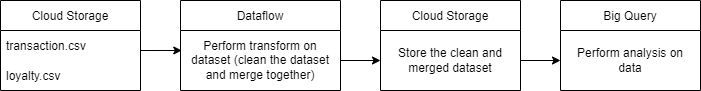

# RFM Model

Build a RFM model that segments customer into below sections:

- Can’t Loose Them’
- Champions
- Loyal/Committed
- Requires Attention
- Potential
- Promising
- Demands Activation

Remark: Since there is no transaction date for each record, we can't further analyse on the Recency (R) of the dataset. We will only analyse on the Frequency (F) and Monetary Value (M) for this dataset.

In [15]:
# Grouping by name
df_group = merge.groupby(['name']).agg({
    'amount': 'sum',
    'transaction_id': 'count'})
df_group

,amount,transaction_id
name,,
Aaron Allen,765,1
Aaron Brooks,1369,1
Aaron Carson,1200,1
Aaron Cochran,910,1
Aaron Collier,1959,1
...,...,...
Zachary Watson,1801,1
Zachary Wells,1231,1
Zoe Crawford,1649,1


In [16]:
# Renaming the columns 
df_group.rename(columns={'transaction_id': 'Frequency',
                         'amount': 'MonetaryValue'}, inplace=True)

In [17]:
# Printing top 5 rows and shape of the updated dataframe
print(df_group.head())
print('{:,} rows; {:,} columns'
      .format(df_group.shape[0], df_group.shape[1]))

               MonetaryValue  Frequency
name                                   
Aaron Allen              765          1
Aaron Brooks            1369          1
Aaron Carson            1200          1
Aaron Cochran            910          1
Aaron Collier           1959          1
9,354 rows; 2 columns


In [18]:
df_group.Frequency.sort_values(ascending=False)

name
Thomas Jones        6
David Smith         6
David Johnson       6
Charles Smith       5
James Johnson       5
                   ..
Melissa Alvarez     1
Melissa Anderson    1
Melissa Andrews     1
Melissa Bailey      1
Aaron Allen         1
Name: Frequency, Length: 9354, dtype: int64

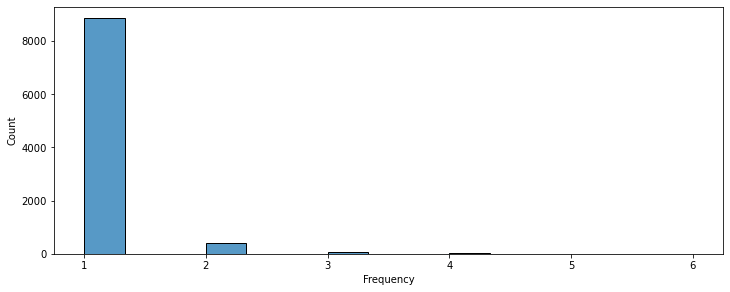

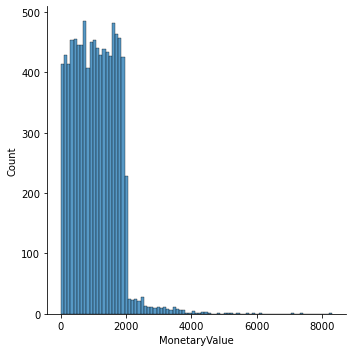

In [19]:
# Plotting RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of F
plt.subplot(2, 1, 1); sns.histplot(df_group['Frequency'])
# Plot distribution of M
sns.displot(df_group['MonetaryValue'])
# Show the plot
plt.show()

In [20]:
#Calculating R and F groups
# # Create labels for Recency and Frequency
f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df_group['Frequency'].rank(method='first'), q=4, labels=f_labels)
# Create new columns R and F 
df_group = df_group.assign(F = f_groups.values)
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df_group['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
df_group = df_group.assign(M = m_groups.values)
df_group.head()

,MonetaryValue,Frequency,F,M
name,,,,
Aaron Allen,765,1,1,2
Aaron Brooks,1369,1,1,3
Aaron Carson,1200,1,1,3
Aaron Cochran,910,1,1,2
Aaron Collier,1959,1,1,4


In [21]:
def join_rfm(x): return str(str(x['F']) + str(x['M']))
df_group['RFM_Segment_Concat'] = df_group.apply(join_rfm, axis=1)
df_rfm = df_group
df_rfm.head()

,MonetaryValue,Frequency,F,M,RFM_Segment_Concat
name,,,,,
Aaron Allen,765,1,1,2,12
Aaron Brooks,1369,1,1,3,13
Aaron Carson,1200,1,1,3,13
Aaron Cochran,910,1,1,2,12
Aaron Collier,1959,1,1,4,14


In [22]:
# Count num of unique segments
df_rfm_count_unique = df_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(df_rfm_count_unique.sum())
# Calculate RFM_Score
df_rfm['RFM_Score'] = df_rfm[['F','M']].sum(axis=1)
print(df_rfm['RFM_Score'].head())

16
name
Aaron Allen      3.0
Aaron Brooks     4.0
Aaron Carson     4.0
Aaron Cochran    3.0
Aaron Collier    5.0
Name: RFM_Score, dtype: float64


In [23]:
df_rfm['RFM_Score'].unique()

array([3., 4., 5., 2., 8., 6., 7.])

In [24]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
    
# Create a new variable RFM_Level
df_rfm['RFM_Level'] = df_rfm.apply(rfm_level, axis=1)
# Printing the header with top 15 rows 
df_rfm.head(15)

,MonetaryValue,Frequency,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
name,,,,,,,
Aaron Allen,765,1,1,2,12,3.0,Demands Activation
Aaron Brooks,1369,1,1,3,13,4.0,Requires Attention
Aaron Carson,1200,1,1,3,13,4.0,Requires Attention
Aaron Cochran,910,1,1,2,12,3.0,Demands Activation
Aaron Collier,1959,1,1,4,14,5.0,Promising
Aaron Combs,999,1,1,2,12,3.0,Demands Activation
Aaron Cruz,286,1,1,1,11,2.0,Demands Activation
Aaron Dean,164,1,1,1,11,2.0,Demands Activation
Aaron Ferguson,474,1,1,1,11,2.0,Demands Activation


In [25]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_rfm_level_agg = df_rfm.groupby('RFM_Level').agg({
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(df_rfm_level_agg)

                   Frequency MonetaryValue      
                        mean          mean count
RFM_Level                                       
Champions                1.6        2204.5   772
Demands Activation       1.0         438.8  1842
Loyal/Commited           1.1        1545.1  1072
Potential                1.0        1284.0  1628
Promising                1.0        1038.5  2222
Requires Attention       1.0         782.6  1818


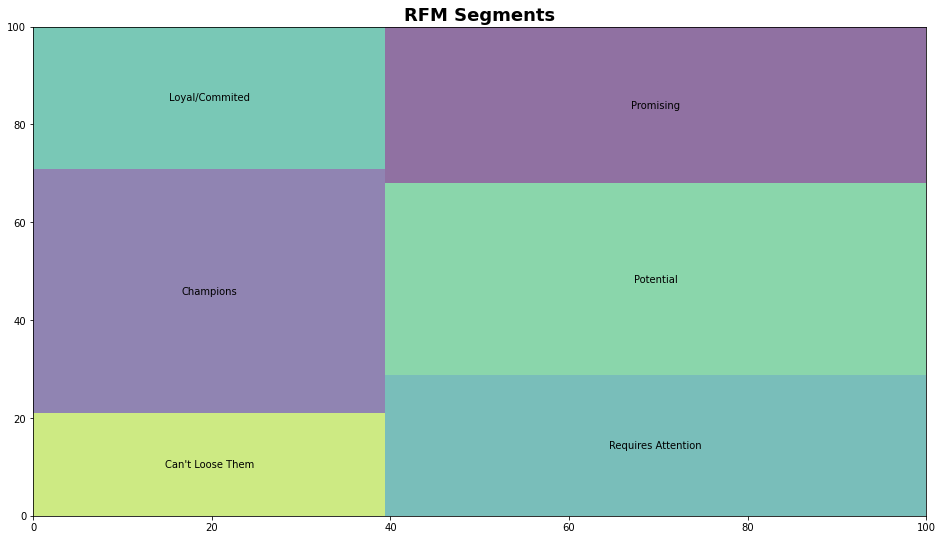

In [28]:
df_rfm_level_agg.columns = ['FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=df_rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal/Commited',
                     'Requires Attention',
                     'Potential', 
                     'Promising', 
                     'Demands Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
# plt.axis('off')
plt.show()